In [182]:
import numpy as np
import matplotlib.pyplot as plt

In [249]:
with open('./data/input_15_2.txt') as handle:
    rows = []
    for line in handle.readlines():
        row = [int(i) for i in line[:500]]
        rows.append(row)

In [250]:
input_map = np.array(rows)

In [251]:
input_map

array([[2, 4, 9, ..., 8, 4, 9],
       [7, 2, 6, ..., 4, 6, 9],
       [5, 1, 9, ..., 3, 4, 2],
       ...,
       [8, 9, 1, ..., 4, 8, 1],
       [4, 6, 4, ..., 1, 6, 2],
       [8, 2, 3, ..., 6, 8, 5]])

In [252]:
input_map.shape

(500, 500)

## Algo part

In [253]:
LIM = 499
END = (LIM, LIM)
INF = 10000

In [254]:
def get_neighbors(r, c):
    
    neighbors = [
        (max(r-1, 0), c),
        (r, min(c+1, LIM)),
        (min(r+1, LIM), c),
        (r, max(c-1, 0))
    ]
    
    # remove self
    neighbors = list(filter(lambda x: x != (r, c), neighbors))
    
    # remove duplicates (edge nodes)
    neighbors = list(set(neighbors))

    return neighbors

In [137]:
cmapping = np.array([
    [1, 8, 3],
    [7, 9, 2],
    [3, 5, 5]
])

In [255]:
cmapping = input_map

In [263]:
visited = np.zeros(shape=(LIM+1, LIM+1), dtype='uint16')

distmap = np.ones(shape=(LIM+1, LIM+1), dtype='uint16')
distmap.fill(INF)

In [264]:
cmapping.shape, visited.shape, distmap.shape

((500, 500), (500, 500), (500, 500))

In [266]:
# init start node
distmap[0, 0] = 0

In [267]:
%%time

#for i in range(100000):
while (r, c) != END:
    non_visited = np.where(visited == 0)
    shortest_val = min(distmap[non_visited])
    distmap[non_visited] == shortest_val  # of all non visited nodes get the ones equal to shortest_val
    
    r = non_visited[0][distmap[non_visited] == shortest_val] # get r/y of lowest unvisited
    c = non_visited[1][distmap[non_visited] == shortest_val] # get c/x of lowest unvisited
    
    # r, c = np.where(distmap == min(distmap[non_visited]))  # pick lowest in 'queue'
    r, c = r[0], c[0]  # just pick first if queues with same value
    
    if (r, c) == END:
        print('Done!')
        break
        
    neighbors = get_neighbors(r, c)

    for neighbor in neighbors:
        nr, nc = neighbor

        if distmap[r, c] + cmapping[nr, nc] < distmap[nr, nc]:
            distmap[nr, nc] = distmap[r, c] + cmapping[nr, nc]
    
    # add to visited
    visited[r, c] = 1

Done!
CPU times: user 34min 21s, sys: 1.55 s, total: 34min 23s
Wall time: 34min 24s


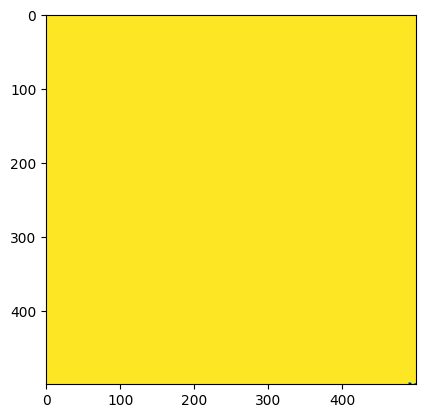

In [268]:
plt.imshow(visited)

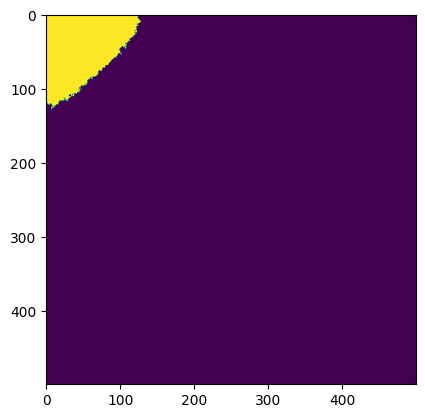

In [260]:
plt.imshow(visited)

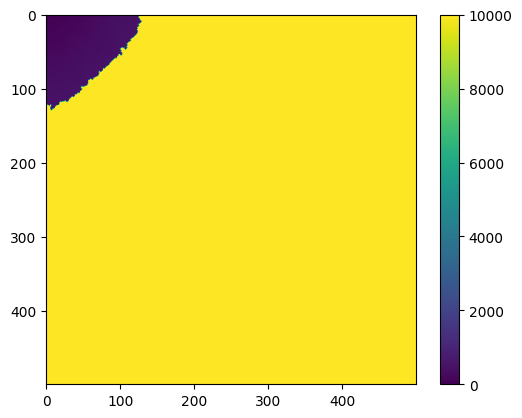

In [261]:
plt.imshow(distmap)
plt.colorbar()

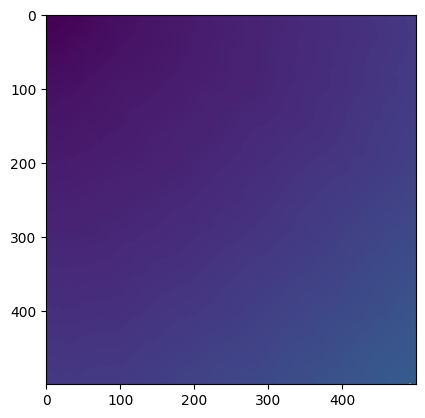

In [269]:
plt.imshow(distmap)

In [270]:
distmap

array([[   0,    4,   13, ..., 1692, 1694, 1703],
       [   7,    6,   12, ..., 1684, 1690, 1699],
       [  12,    7,   16, ..., 1684, 1688, 1690],
       ...,
       [1704, 1706, 1697, ..., 2879, 2887, 2888],
       [1708, 1707, 1701, ..., 2880, 2886, 2888],
       [1714, 1706, 1704, ..., 2886, 2894, 2893]], dtype=uint16)

In [248]:
distmap

array([[  0,   4,  13, ..., 434, 443, 444],
       [  7,   6,  12, ..., 436, 434, 439],
       [ 12,   7,  16, ..., 427, 432, 438],
       ...,
       [419, 418, 424, ..., 655, 664, 666],
       [428, 420, 429, ..., 657, 664, 667],
       [431, 427, 435, ..., 664, 673, 673]], dtype=uint16)

In [219]:
non_visited[0][distmap[non_visited] == 10000], non_visited[1][distmap[non_visited] == 13]

(array([ 0,  0,  0, ..., 99, 99, 99]), array([2]))

In [207]:
np.where(distmap == min(distmap[non_visited]))

(array([1, 2]), array([0, 1]))

In [206]:
r, c

(1, 0)

In [198]:
visited

array([[1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

In [199]:
distmap

array([[    0,     4,    13, ..., 10000, 10000, 10000],
       [    7,     6,    12, ..., 10000, 10000, 10000],
       [   12,     7, 10000, ..., 10000, 10000, 10000],
       ...,
       [10000, 10000, 10000, ..., 10000, 10000, 10000],
       [10000, 10000, 10000, ..., 10000, 10000, 10000],
       [10000, 10000, 10000, ..., 10000, 10000, 10000]], dtype=uint16)

In [153]:
neighbors

[(0, 1), (1, 0), (1, 2), (2, 1)]

In [62]:
nodes = [(1, (0, 0)), (4, (1, 0)), (5, (0, 1))]

In [63]:
queue = []

In [69]:
heapq.heappush(queue, nodes[0])
heapq.heappush(queue, nodes[2])
heapq.heappush(queue, nodes[1])

In [65]:
current = heapq.heappop(queue)

In [66]:
shortest, position = current
shortest, position

(1, (0, 0))

In [ ]:
visited = []

In [ ]:
shortest, position = current

# get neighbor positions
neighbors = get_neighbors(position)

for neighbor in neighbors:
    if neighbor in visited:
        continue

    r, c = neighbor

    if shortest + mapping[r, c] < dist_map[r, c]:
        dist_map[r, c] = shortest + dist
    
    heapq.heappush(queue, (shortest + dist, neighbor))
    
    # TODO already heap?

    # TODO is visited already?

visited.append(position)

In [72]:
queue

[(1, (0, 0)), (1, (0, 0)), (4, (1, 0)), (4, (1, 0)), (5, (0, 1)), (5, (0, 1))]

In [73]:
set(queue)

{(1, (0, 0)), (4, (1, 0)), (5, (0, 1))}

In [ ]:
# for node in enumerate(queue)
# if pos == neighbor
#.   if value

In [ ]:
# update min
if node in queue
if node val is smaller
heapq.heapreplace

In [76]:
?heapq.heappop

Signature: heapq.heappop(heap, /)
Docstring: Pop the smallest item off the heap, maintaining the heap invariant.
Type:      builtin_function_or_method


In [95]:
a = np.array([
    [100, 100, 2],
    [1, 100, 1]
])

In [96]:
np.where(a == np.min(a))

(array([1, 1]), array([0, 2]))

In [90]:
?np.where

Docstring:
where(condition, [x, y], /)

Return elements chosen from `x` or `y` depending on `condition`.

.. note::
    When only `condition` is provided, this function is a shorthand for
    ``np.asarray(condition).nonzero()``. Using `nonzero` directly should be
    preferred, as it behaves correctly for subclasses. The rest of this
    documentation covers only the case where all three arguments are
    provided.

Parameters
----------
condition : array_like, bool
    Where True, yield `x`, otherwise yield `y`.
x, y : array_like
    Values from which to choose. `x`, `y` and `condition` need to be
    broadcastable to some shape.

Returns
-------
out : ndarray
    An array with elements from `x` where `condition` is True, and elements
    from `y` elsewhere.

See Also
--------
choose
nonzero : The function that is called when x and y are omitted

Notes
-----
If all the arrays are 1-D, `where` is equivalent to::

    [xv if c else yv
     for c, xv, yv in zip(condition, x, y)]

Example